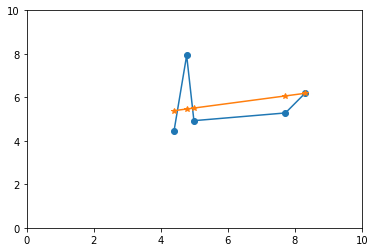

In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt

#####################
##### FUNCTIONS #####
#####################

# In Supervised Machine Learning, to perform regression on a set of data we want to define a cost function. Our goal is to
# find the minimum of this cost function in order to find the best fit line.
# Our cost function is J(w) = (1/2m) * [SUM from i=1 to m] [yhat(w) - y]^2
def cost_function(m, yhat, y):
    # m is the number of input data points
    # yhat is the best fit line estimate for a given value of slope, w
    # y is the input data value for a given x
    
    # We assume that the vectors yhat and y have the correct number of entries
    if yhat.size != m and y.size != m:
        print('The data arrays passed in to the cost function are not the correct size.')
        exit()
    
    # Calculate a vector of the squares of the errors
    sqErr = np.square(yhat - y)
    
    # Sum all of the squared errors to get a scalar
    sumErr = np.sum(sqErr)
    
    # Calculate the cost function
    Jw = (1./(2.*m)) * sumErr
    
    return Jw

#####################
##### MAIN CODE #####
#####################

# Initialize basic variables
m = 5   # Number of input data points
x = np.array([])   # Vector of independent variable data points
y = np.array([])   # Vector of dependent variable data points
boxSize = 10.   # Size of the box made by the data in the xy-plane

# In the absence of real data, generate a series of random numbers
for i in range(0, m):
    x = np.append(x, boxSize*r.random())
    y = np.append(y, boxSize*r.random())
    
# Find the indices where the sorted x values will end up and use it to also sort the y values
xySort = x.argsort()
x = x[xySort]
y = y[xySort]

# Make a vector of the different slope (w) and y-intercept (b) values to try
# Our linear fit equation is y = wx + b
# We'll test an order of magnitude more parameter values than the number of input points
w = np.linspace(-boxSize, boxSize, num=10*m)
b = np.linspace(0., boxSize, num=10*m)

# Make a matrix for our error values
err = np.zeros((len(w), len(b)))

# For each one of our x-values,
for wInd in range(0, len(w)):
    # and for every individual one of our potential slope values w,
    for bInd in range(0, len(b)):
        # calculate the error corresponding to every potential y-intercept b.
        wx = np.multiply(w[wInd], x)
        yhat = np.add(wx, b[bInd])
        err[wInd][bInd] = cost_function(m,yhat,y)
        
# Minimize the error to find the best fit line
errMin = np.min(err)
wInd = np.where(err == errMin)[0][0]   # Matrix indices that correspond to the minimum error
bInd = np.where(err == errMin)[1][0]
wx = np.multiply(w[wInd],x)
yMin = np.add(wx,b[bInd])

# Plot both the input data and the regression line
plt.axis([0., boxSize, 0., boxSize])
plt.plot(x, y, marker='o')
plt.plot(x, yMin, marker='*')
plt.show()

The update steps for gradient descent in our linear regression model are given by

\begin{gather}
    w_{new} = w - \alpha \frac{\partial}{\partial w} J(w,b) \\
    b_{new} = b - \alpha \frac{\partial}{\partial b} J(w,b)
\end{gather}

where $\alpha$ is the learning rate. To compute this, we need to find the partial derivatives:

\begin{gather}
    \frac{\partial}{\partial w} J(w,b)
    = \frac{\partial}{\partial w} \left[ \frac{1}{2m} \sum_{i=0}^m (\hat{y}-y)^2 \right]
    = \frac{\partial}{\partial w} \left[ \frac{1}{2m} \sum_{i=0}^m (wx+b-y)^2 \right]
    = \frac{1}{2m} \sum_{i=0}^m \left[ 2x(wx+b-y) \right]
    = \frac{1}{m} \sum_{i=0}^m  x(wx+b-y)
    \\
    \frac{\partial}{\partial b} J(w,b)
    = \frac{\partial}{\partial b} \left[ \frac{1}{2m} \sum_{i=0}^m (wx+b-y)^2 \right]
    = \frac{1}{2m} \sum_{i=0}^m \left[ 2(wx+b-y) \right]
    = \frac{1}{m} \sum_{i=0}^m  (wx+b-y)
\end{gather}

With this information, we can write our update steps as

\begin{gather}
    w_{new} = w - \frac{\alpha}{m} \sum_{i=0}^m  x(wx+b-y) \\
    b_{new} = b - \frac{\alpha}{m} \sum_{i=0}^m  (wx+b-y)
\end{gather}